In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [ ]:
data = pd.read_csv('/content/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.shape

(303, 14)

# EDA

target
1    165
0    138
Name: count, dtype: int64


<Axes: xlabel='target'>

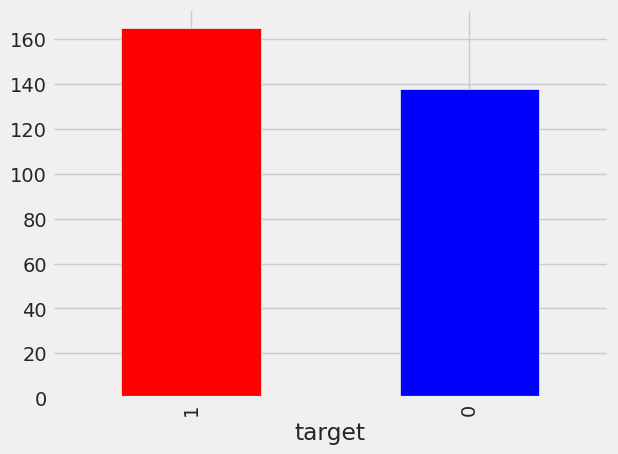

In [ ]:
class_counts = data['target'].value_counts()
print(class_counts)
data.target.value_counts().plot(kind="bar", color=["red", "blue"])

In [ ]:
# Checking for missing values
data.isna().sum().sum()

0

Dataset have no missing value

In [ ]:
categorical_val = []
continous_val = []
for column in data.columns:
    print('---------------------------------------------------')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

---------------------------------------------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
---------------------------------------------------
sex : [1 0]
---------------------------------------------------
cp : [3 2 1 0]
---------------------------------------------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
---------------------------------------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 27

In [ ]:
print(f"Continuous Values: {continous_val}")
print(f"Categorical Values: {categorical_val}")

Continuous Values: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Categorical Values: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [ ]:
categorical_val.remove('target')

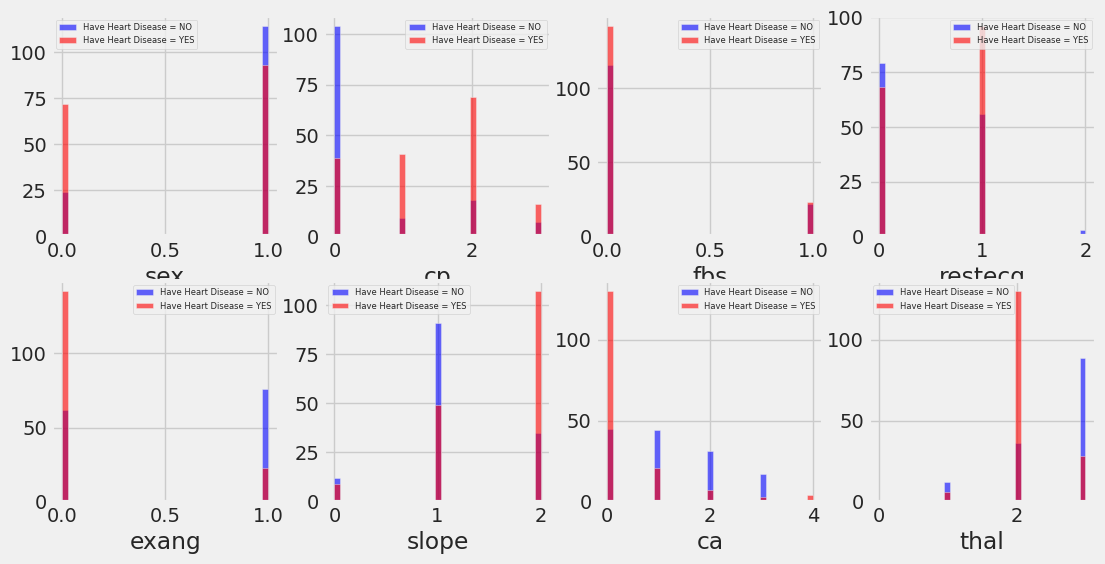

In [ ]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(2, 4, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend(fontsize=6)
    plt.xlabel(column)

Observations from the above plot:

* cp {Chest pain}: People with cp 1, 2, 3 are more likely to have heart disease than people with cp 0.
* restecg {resting EKG results}: People with a value of 1 (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems) are more likely to have heart disease.
* exang {exercise-induced angina}: people with a value of 0 (No ==> angina induced by exercise) have more heart disease than people with a value of 1 (Yes ==> angina induced by exercise)
* slope {the slope of the ST segment of peak exercise}: People with a slope value of 2 (Downslopins: signs of an unhealthy heart) are more likely to have heart disease than people with a slope value of 2 slope is 0 (Upsloping: best heart rate with exercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
* ca {number of major vessels (0-3) stained by fluoroscopy}: the more blood movement the better, so people with ca equal to 0 are more likely to have heart disease.
* thal {thalium stress result}: People with a thal value of 2 (defect corrected: once was a defect but ok now) are more likely to have heart disease.

(14.5, -0.5)

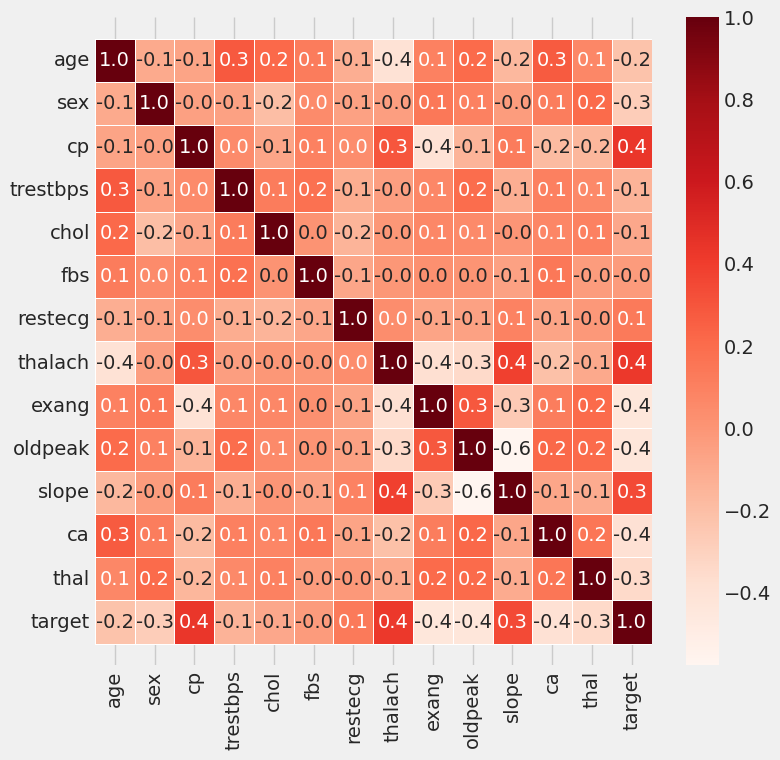

In [ ]:
# Let's make our correlation matrix a little prettier
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".1f",
                 cmap="Reds");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<Axes: title={'center': 'Correlation with target'}>

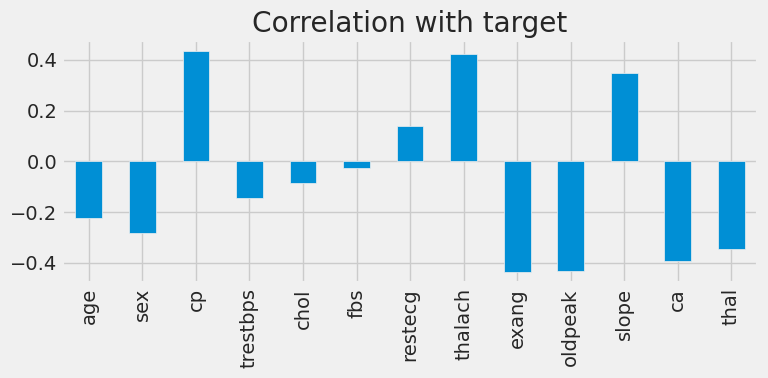

In [ ]:
data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', grid=True, figsize=(8, 3),
                                                   title="Correlation with target")

* fbs and chol are the least correlated with the target variable.
* All other variables have a significant correlation with the target variable.

In [ ]:
# Preprocess the data
s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[col_to_scale] = s_sc.fit_transform(data[col_to_scale])

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


# Model Training

In [ ]:
X = data.drop('target', axis=1)
y = data.target
#  splitting the dataset to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Function to evaluate different ML models
def evaluate_model(model, X_train, y_train, cv):
    # Perform 10-fold cross-validation and compute average scores
    cv_accuracy = np.mean(cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy'))
    cv_precision = np.mean(cross_val_score(model, X_train, y_train, cv=cv, scoring='precision'))
    cv_recall = np.mean(cross_val_score(model, X_train, y_train, cv=cv, scoring='recall'))
    cv_f1 = np.mean(cross_val_score(model, X_train, y_train, cv=cv, scoring='f1'))

    return cv_accuracy, cv_precision, cv_recall, cv_f1

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XG-Boost Classifier': XGBClassifier()
}

In [ ]:
# Evaluate each model and print the results for 10-fold cross validation
def final(models, cv):
  print(f'With {cv}-fold cross-validation')
  for model_name, model in models.items():
      cv_accuracy, cv_precision, cv_recall, cv_f1 = evaluate_model(model, X_train, y_train, cv)
      print(f"Model: {model_name}")
      print(f"Average Cross-Validation Accuracy: {cv_accuracy*100:.2f}%")
      print(f"Average Cross-Validation Precision: {cv_precision*100:.2f}%")
      print(f"Average Cross-Validation Recall: {cv_recall*100:.2f}%")
      print(f"Average Cross-Validation F1 Score: {cv_f1*100:.2f}%")
      print("_" * 50)

In [ ]:
# With 5-fold cross-validation
final(models, cv=5)

With 5-fold cross-validation
Model: Logistic Regression
Average Cross-Validation Accuracy: 80.98%
Average Cross-Validation Precision: 80.96%
Average Cross-Validation Recall: 85.70%
Average Cross-Validation F1 Score: 83.14%
__________________________________________________
Model: Decision Tree
Average Cross-Validation Accuracy: 73.55%
Average Cross-Validation Precision: 78.66%
Average Cross-Validation Recall: 78.12%
Average Cross-Validation F1 Score: 76.97%
__________________________________________________
Model: Random Forest
Average Cross-Validation Accuracy: 78.51%
Average Cross-Validation Precision: 81.52%
Average Cross-Validation Recall: 81.94%
Average Cross-Validation F1 Score: 83.00%
__________________________________________________
Model: Support Vector Machine
Average Cross-Validation Accuracy: 80.58%
Average Cross-Validation Precision: 78.82%
Average Cross-Validation Recall: 88.75%
Average Cross-Validation F1 Score: 83.33%
__________________________________________________


In [ ]:
# With 10-fold cross-validation
final(models, cv=10)

With 10-fold cross-validation
Model: Logistic Regression
Average Cross-Validation Accuracy: 81.02%
Average Cross-Validation Precision: 80.81%
Average Cross-Validation Recall: 86.43%
Average Cross-Validation F1 Score: 83.17%
__________________________________________________
Model: Decision Tree
Average Cross-Validation Accuracy: 72.30%
Average Cross-Validation Precision: 73.46%
Average Cross-Validation Recall: 76.70%
Average Cross-Validation F1 Score: 75.42%
__________________________________________________
Model: Random Forest
Average Cross-Validation Accuracy: 81.82%
Average Cross-Validation Precision: 82.96%
Average Cross-Validation Recall: 81.98%
Average Cross-Validation F1 Score: 82.65%
__________________________________________________
Model: Support Vector Machine
Average Cross-Validation Accuracy: 81.03%
Average Cross-Validation Precision: 79.00%
Average Cross-Validation Recall: 90.27%
Average Cross-Validation F1 Score: 83.96%
__________________________________________________

In [ ]:
# Train the best model (you can choose the model based on cross-validation results)
best_model = SVC()
best_model.fit(X_train, y_train)

# Test the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Model (Support Vector Machine) Test Results:")
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Best Model (Support Vector Machine) Test Results:
Accuracy: 86.89%
Precision: 85.29%
Recall: 90.62%
F1 Score: 87.88%
